In [28]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

plt.style.use('dark_background')
sns.set_palette("Set1")

In [33]:
df = pd.read_csv('SDSS_Data.csv')

# Remove outliers for u, g, i, r, z
df = df[df['u'] > 0]
df = df[df['g'] > 0]
df = df[df['i'] > 0]
df = df[df['r'] > 0]
df = df[df['z'] > 0]

# Convert inf values to NaN
df = df.replace([np.inf, -np.inf], np.nan)

# Features
df['g-r'] = df['g'] - df['r']
df['i-z'] = df['i'] - df['z']
df['u-r'] = df['u'] - df['r']
df['i-r'] = df['i'] - df['r']
df['z-r'] = df['z'] - df['r']

# Save as CSV
df.to_csv('SDSS_Data_F.csv', index=False)

In [32]:
def distro(df, target):
    labels = df[target].unique()
    class_counts = df[target].value_counts()
    class_proportions = (class_counts / df.shape[0]) * 100

    def make_autopct(values):
        def my_autopct(pct):
            total = sum(values)
            val = int(round(pct*total/100.0))
            return '{p:.1f}%  ({v:d})'.format(p=pct,v=val)
        return my_autopct

    plt.pie(class_proportions, labels=labels, autopct=make_autopct(class_counts), startangle=140, explode=[0.1]*len(labels))
    plt.title('Class Distribution')

    plt.show()

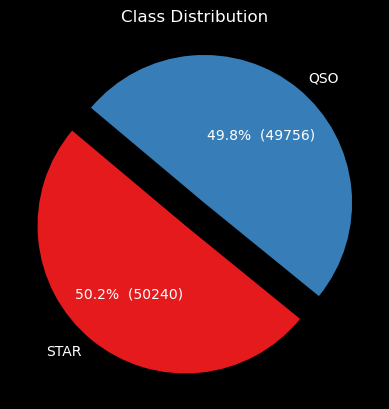

In [4]:
distro(df=df, target='class')

In [5]:
imp_cols = ['ra', 'dec', 'u', 'g', 'r', 'i', 'z', 'redshift']

In [6]:
def pdf(df, features, target):
    plt.figure(figsize=(15, 30))
    for (i, feature) in zip(range(len(features)), features):
        plt.subplot(int(f'{len(features)}2{i+1}'))
        sns.kdeplot(data=df, x=feature, hue=target, fill=True)
        plt.title(label=f'PDF of {feature}', fontsize=10)
        plt.xlabel(xlabel='')
        if feature == 'redshift':
            plt.ylim(0, 1.5)
            plt.xlim(0, 3.5)
        i += 1
    plt.show()

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

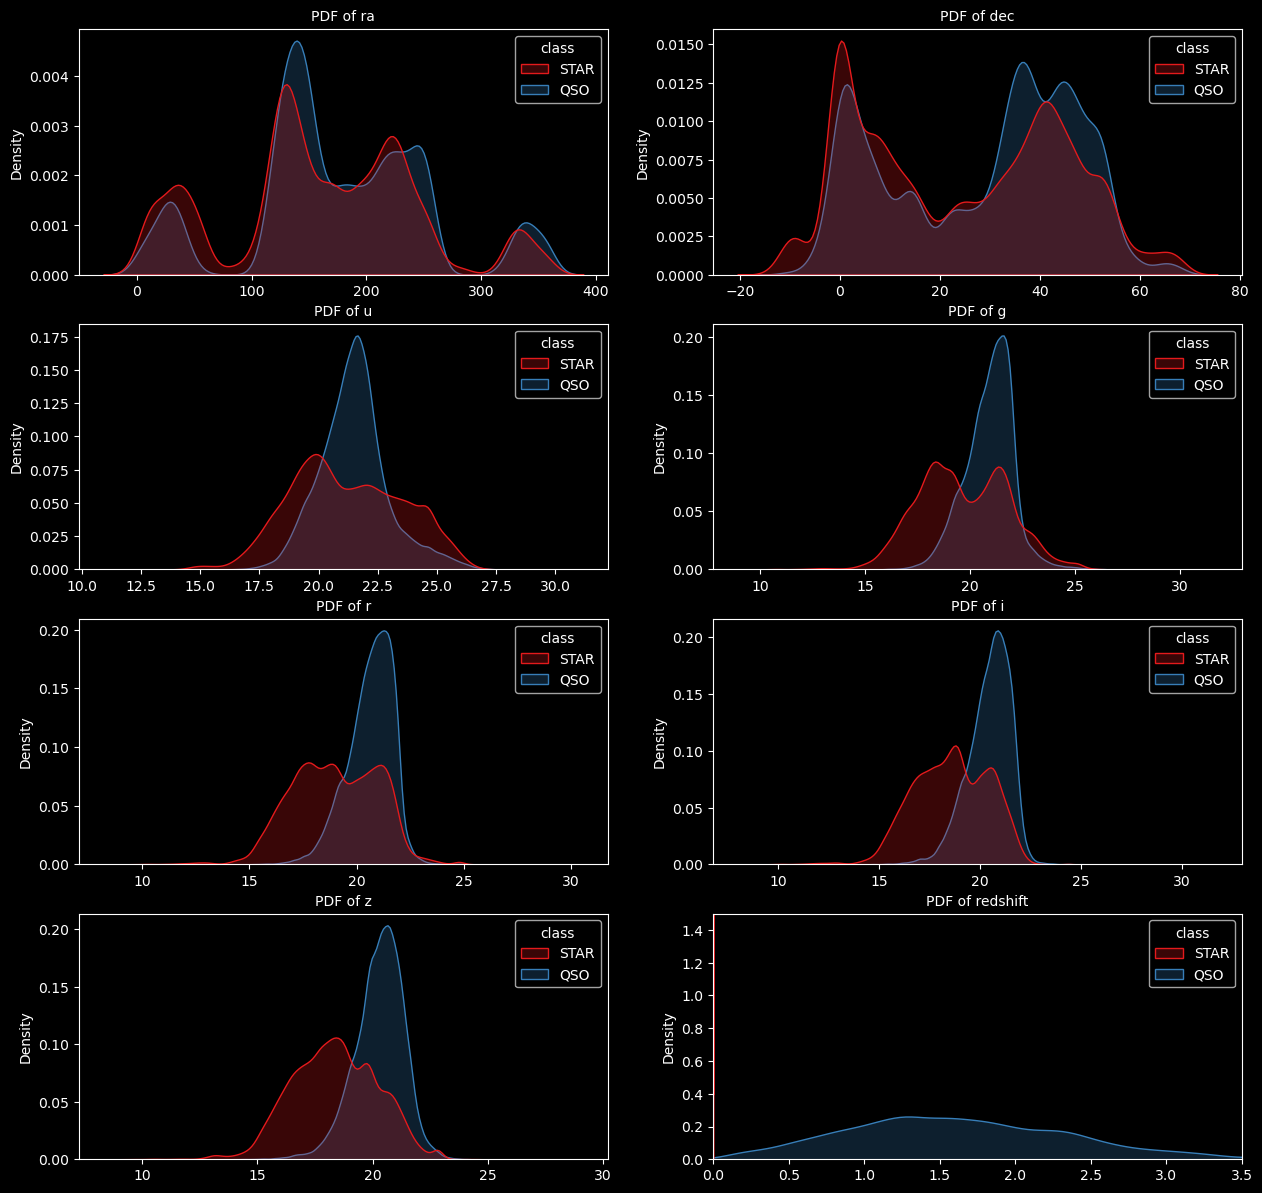

In [7]:
pdf(df=df, features=imp_cols, target='class')

In [8]:
# Pairplots of ra, dec, redshift

def pairplot1(df, features, target):
    sns.pairplot(data=df, vars=features, hue=target)
    plt.show()

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


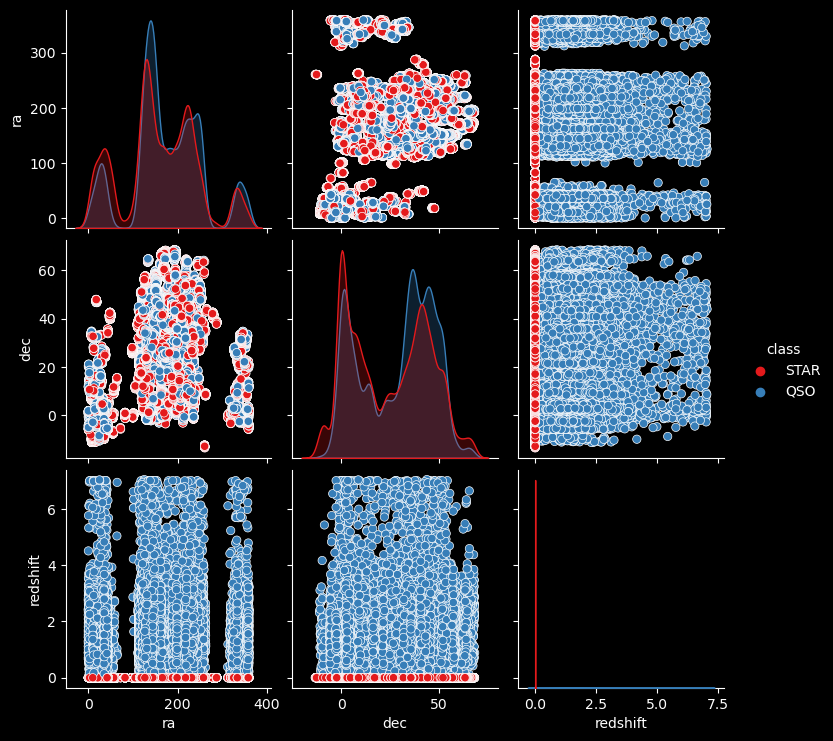

In [9]:
pairplot1(df=df, features=['ra', 'dec', 'redshift'], target='class')

In [10]:
def pairplot2(df, features, target):
    sns.pairplot(data=df, vars=features, hue=target)
    plt.show()

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

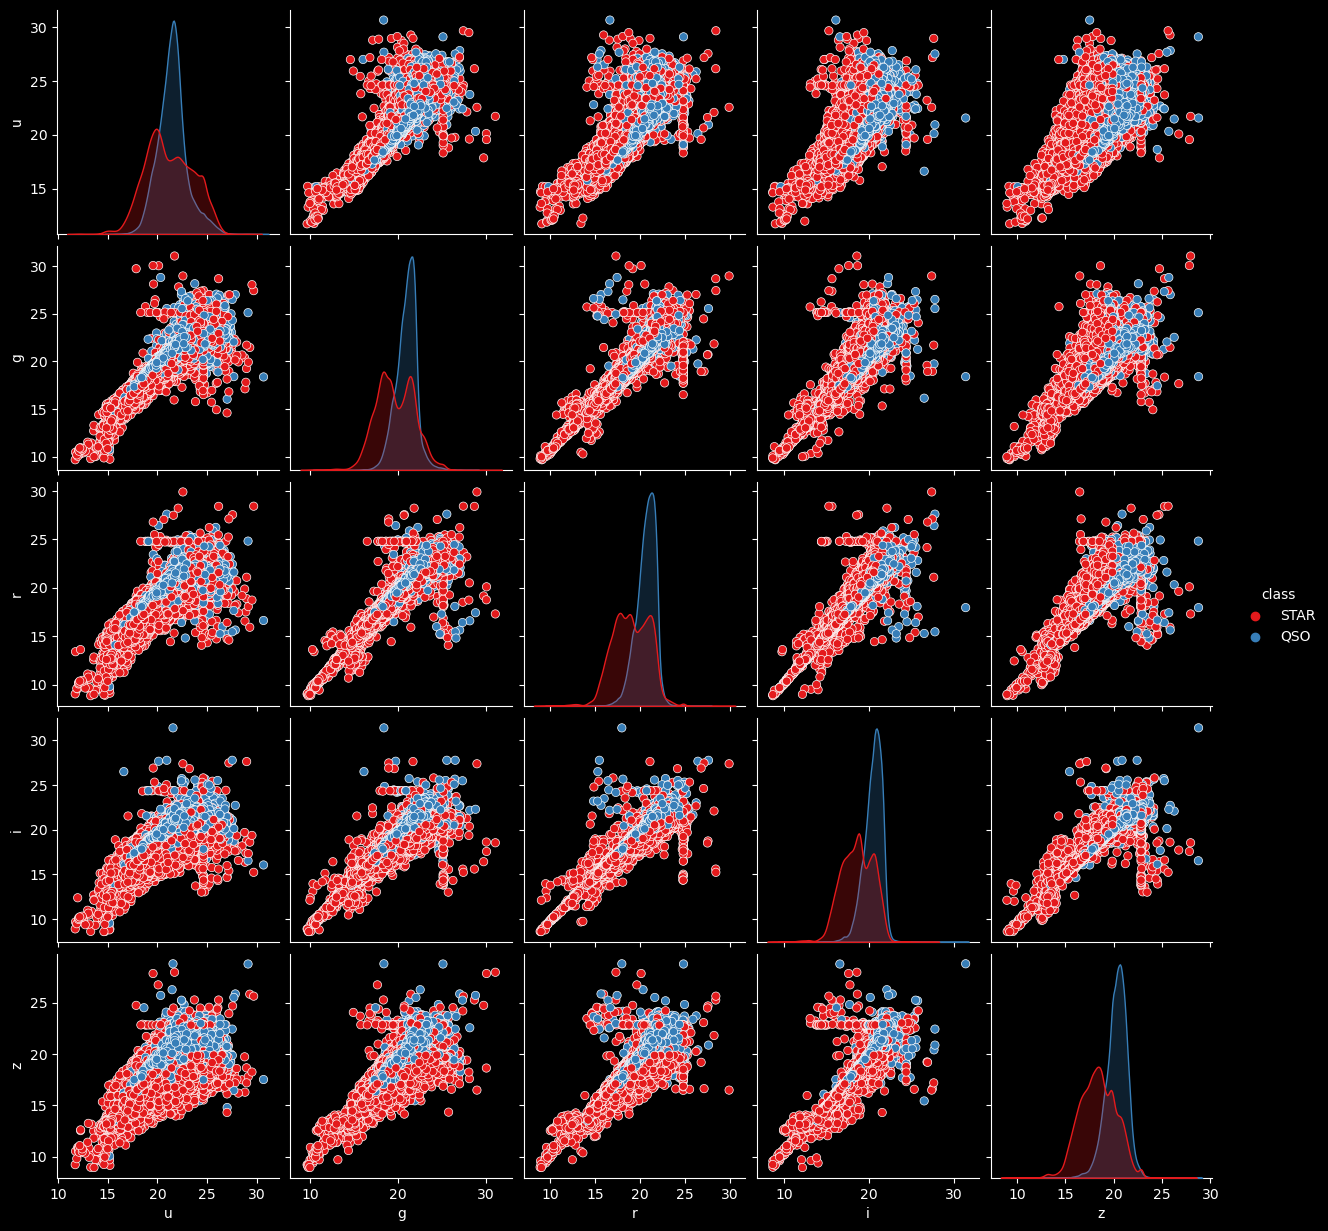

In [11]:
pairplot2(df=df, features=['u', 'g', 'r', 'i', 'z'], target='class')